In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


DATA PREPROCESS

The Telco Customer Churn dataset provides information about customers of a telecommunications company and their churn behavior. By analyzing this dataset, we can gain insights into customer behavior and factors that may contribute to customer churn

In [109]:
import pandas as pd
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [110]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
# Upgrade pandas profiling
!pip install pandas-profiling --upgrade

In [112]:
# Pandas profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling', minimal=True, progress_bar=False)
profile.to_notebook_iframe()

In [113]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


<Axes: >

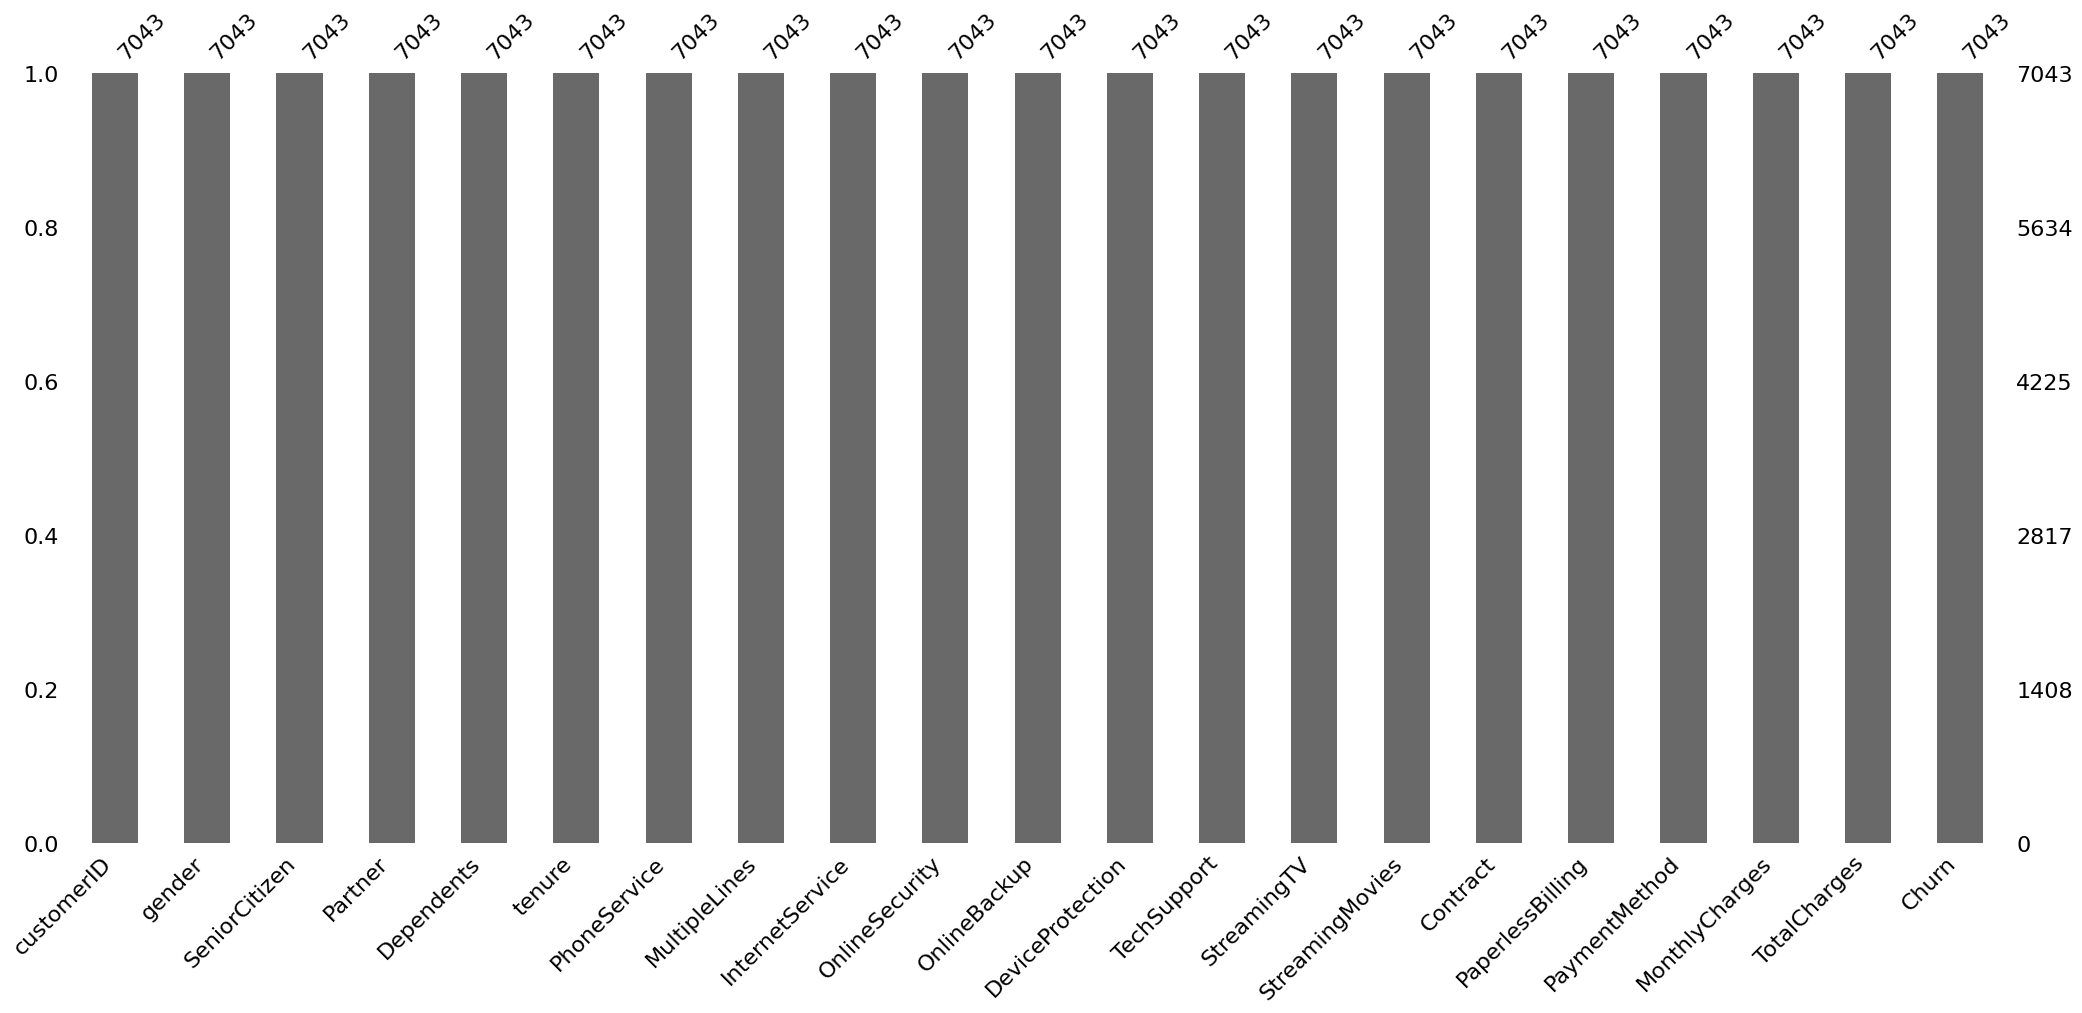

In [114]:
#to detect the missing data
import missingno as msno
msno.bar(df)

In [115]:
def analyze_dataset(df):
    # Print dataset information
    print("Dataset Information:")
    print(df.info())

    # Print dataset summary statistics
    print("\nSummary Statistics:")
    print(df.describe())

    # Count the number of churned and non-churned customers
    churn_counts = df["Churn"].value_counts()
    print("\nChurn Counts:")
    print(churn_counts)

    # Check for missing values
    missing_values = df.isnull().sum()
    print("\nMissing Values:")
    print(missing_values)

    # Check unique values in categorical columns
    categorical_cols = df.select_dtypes(include=["object"]).columns
    print("\nUnique Values in Categorical Columns:")
    for col in categorical_cols:
        unique_values = df[col].unique()
        print(f"{col}: {unique_values}")

    # Check the correlation between numerical features
    numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
    correlation_matrix = df[numerical_cols].corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

In [116]:
# Analyze the dataset
analyze_dataset(df)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

In [117]:
# Select relevant features for churn prediction
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
            'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']

In [118]:
def preprocess_data(df):
    df.dropna(inplace=True)

    # Encode categorical features
    label_encoder = LabelEncoder()
    for feature in features:
        df[feature] = label_encoder.fit_transform(df[feature])

    return df, features

In [119]:
preprocessed_df, selected_features = preprocess_data(df)

DATA VISUALISATION

In [120]:
def get_dataset_insights(df):
    # Calculate churn rate
    churn_rate = df['Churn'].value_counts(normalize=True) * 100

    # Plot churn rate
    plt.figure(figsize=(6, 4))
    sns.barplot(x=churn_rate.index, y=churn_rate.values)
    plt.xlabel('Churn')
    plt.ylabel('Percentage')
    plt.title('Churn Rate')
    plt.show()

    print("\n\n")

    # Plot distribution of tenure
    plt.figure(figsize=(8, 4))
    sns.histplot(df['tenure'], bins=30, kde=True)
    plt.xlabel('Tenure')
    plt.ylabel('Count')
    plt.title('Distribution of Tenure')
    plt.show()


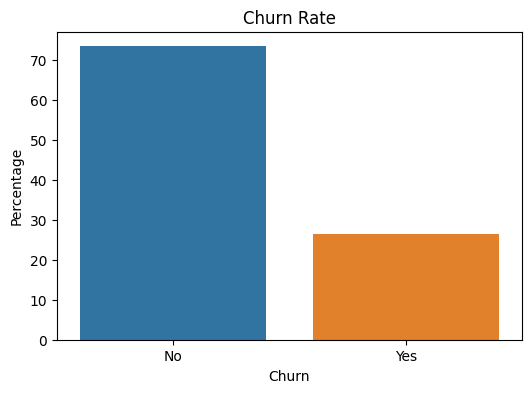

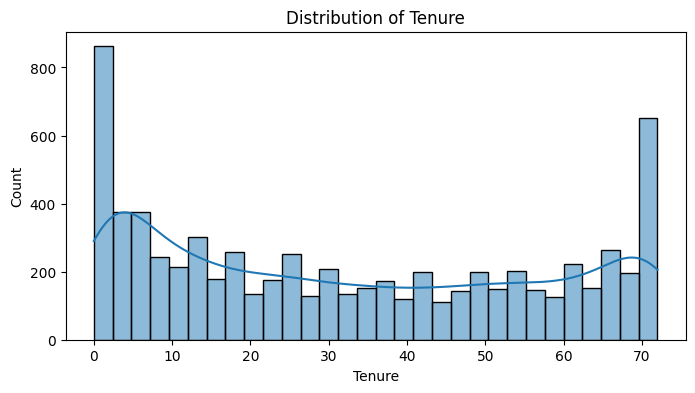

In [121]:
# Get insights from the dataset
get_dataset_insights(df)

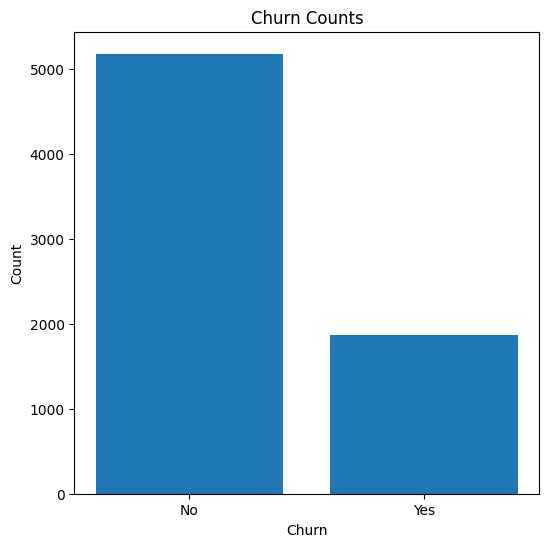

In [122]:
# Count the number of churned and non-churned customers
churn_counts = df["Churn"].value_counts()

# Plot the churn counts
plt.figure(figsize=(6, 6))
plt.bar(churn_counts.index, churn_counts.values)
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Churn Counts")
plt.show()

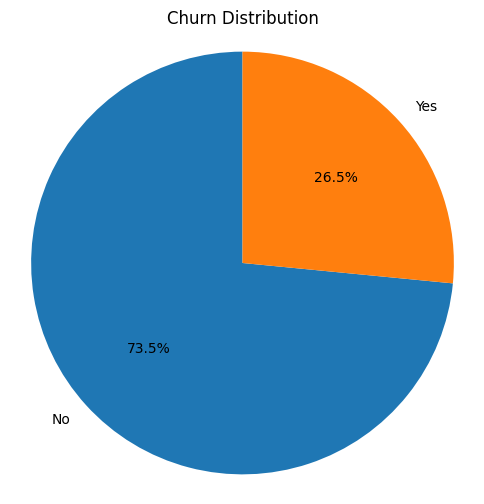

In [123]:
# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Churn Distribution")
plt.axis('equal')
plt.show()

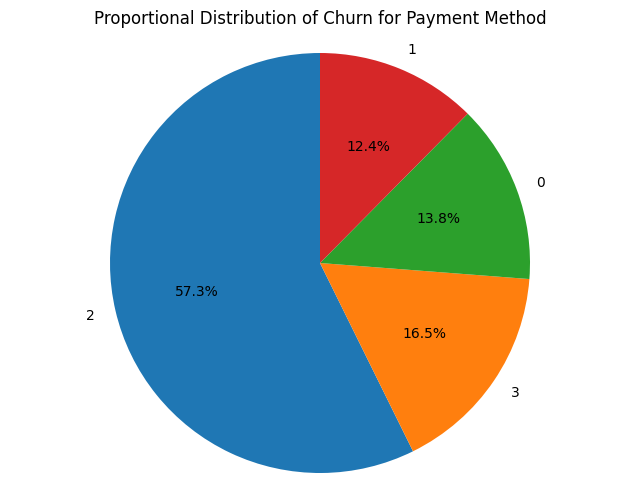

In [124]:
df_payment_churn = df[['PaymentMethod', 'Churn']]
churn_counts = df_payment_churn[df_payment_churn['Churn'] == 'Yes']['PaymentMethod'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportional Distribution of Churn for Payment Method')
plt.axis('equal')
plt.show()

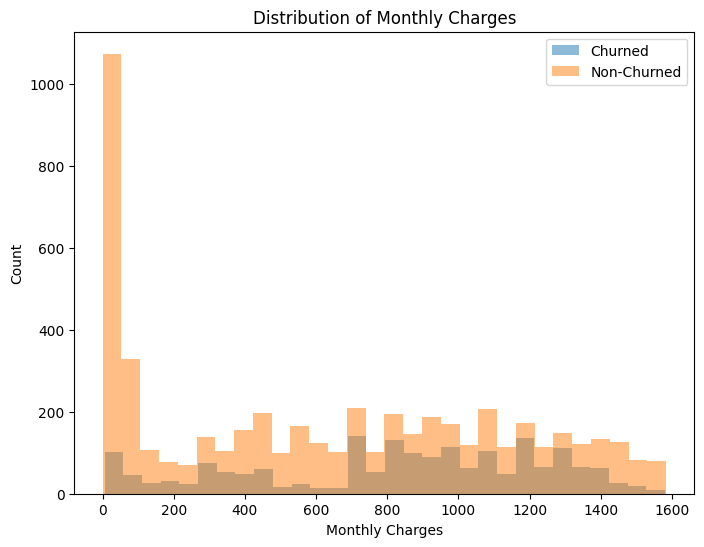

In [125]:
# Separate churned and non-churned customers
churned_customers = df[df["Churn"] == "Yes"]
non_churned_customers = df[df["Churn"] == "No"]

# Plot histograms of monthly charges
plt.figure(figsize=(8, 6))
plt.hist(churned_customers["MonthlyCharges"], bins=30, alpha=0.5, label="Churned")
plt.hist(non_churned_customers["MonthlyCharges"], bins=30, alpha=0.5, label="Non-Churned")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.title("Distribution of Monthly Charges")
plt.legend()
plt.show()

In [126]:
# Select relevant numerical features for correlation
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Compute the correlation matrix
correlation_matrix = df[numerical_features].corr()

<ipython-input-126-a8cd2e9c24b0>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[numerical_features].corr()


In [127]:
correlation_matrix

,tenure,MonthlyCharges
tenure,1.000000,0.268133
MonthlyCharges,0.268133,1.000000


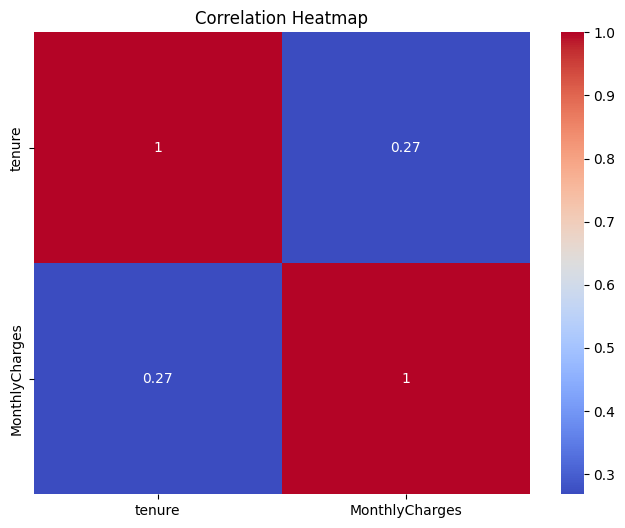

In [128]:
# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-129-b07656e358f3>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=numeric_variable, shade=True)


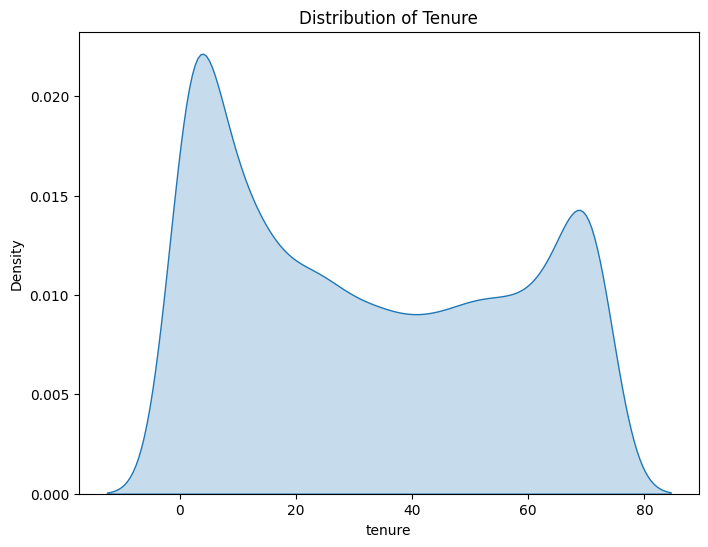

In [129]:
numeric_variable = 'tenure'

# Plot the KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x=numeric_variable, shade=True)
plt.xlabel(numeric_variable)
plt.ylabel('Density')
plt.title('Distribution of Tenure')
plt.show()

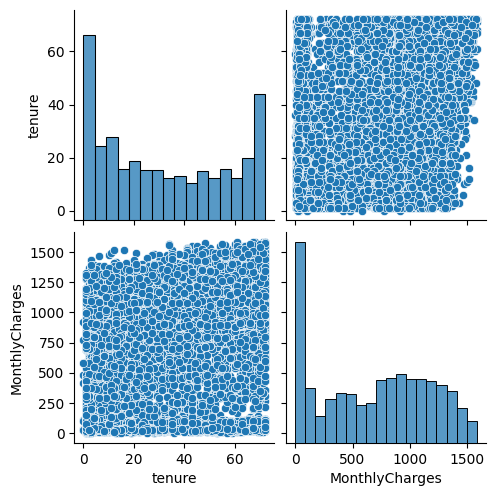

In [130]:
# Select relevant columns for the pair plot
columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot the pair plot
sns.pairplot(data=df[columns])
plt.show()

MODEL TRAINING

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def train_model(df, features, target):
    # Split the data into training and testing sets
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    return model, X_test, y_test

In [132]:
model, X_test, y_test = train_model(preprocessed_df, selected_features, 'Churn')

EVALUATE MODEL

In [133]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(model, X_test, y_test):
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return cm

In [134]:
confusion_mat = evaluate_model(model, X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1036
         Yes       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



In [135]:
# Extract attributes from the confusion matrix
true_negatives = confusion_mat[0, 0]
false_positives = confusion_mat[0, 1]
false_negatives = confusion_mat[1, 0]
true_positives = confusion_mat[1, 1]

# Compute other evaluation metrics
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the attributes and evaluation metrics
print("Confusion Matrix:")
print(confusion_mat)

print("True Negatives:", true_negatives)
print("False Positives:", false_positives)
print("False Negatives:", false_negatives)
print("True Positives:", true_positives)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Confusion Matrix:
[[939  97]
 [168 205]]
True Negatives: 939
False Positives: 97
False Negatives: 168
True Positives: 205
Accuracy: 0.8119233498935415
Precision: 0.6788079470198676
Recall: 0.5495978552278821
F1-Score: 0.6074074074074075


Incorporate handling imbalanced data and hyperparameter tuning to improve the model training:

In [136]:
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

df.dropna(inplace=True)
target = 'Churn'
X = df[features]
y = df[target]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handling imbalanced data
oversampler = SMOTE(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_scaled, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Model evaluation
y_pred = best_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.73      0.77      1021
         Yes       0.76      0.84      0.80      1049

    accuracy                           0.78      2070
   macro avg       0.79      0.78      0.78      2070
weighted avg       0.79      0.78      0.78      2070



In [137]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

def predict_churn(model_predictions):
    # Initialize the label encoder
    label_enc = LabelEncoder()

    # Fit the label encoder on the target variable
    label_enc.fit(y)

    # Convert the predicted probabilities to churn predictions
    churn_predictions = (model_predictions > 0.5).astype(int).ravel()
    churn_predictions = label_enc.inverse_transform(churn_predictions)

    return churn_predictions

In [138]:
model_predictions = np.array([0.3, 0.7, 0.9])  # Replace with your actual model predictions
churn_predictions = predict_churn(model_predictions)

print("Churn Predictions:", churn_predictions)

Churn Predictions: ['No' 'Yes' 'Yes']
